In [1]:
import pandas as pd
from ebi_eva_internal_pyutils.metadata_utils import get_metadata_connection_handle
from ebi_eva_internal_pyutils.pg_utils import get_all_results_for_query

/Users/tcezard/PycharmProjects/eva-tasks/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Daily and Yearly plot for FTP and WEB traffic

In [2]:
private_config_xml_file = 'maven_settings.xml'
query_ftp = '''select event_ts, uhost,  file_name, file_size
           from eva_web_srvc_stats.ftp_traffic
           where file_size>0;'''

with get_metadata_connection_handle('production_processing', private_config_xml_file) as db_conn:
    all_ftp_df = pd.DataFrame(get_all_results_for_query(db_conn, query_ftp), columns =['event_ts', 'uhost', 'file_name', 'file_size'])

all_ftp_df_daily = all_ftp_df.groupby(all_ftp_df.event_ts.dt.date).agg(
    file_size=pd.NamedAgg(column='file_size', aggfunc='sum'),
    uhost=pd.NamedAgg(column='uhost', aggfunc='nunique'),
    nb_request=pd.NamedAgg(column='uhost', aggfunc='count'))
all_ftp_df_daily.reset_index(inplace=True)
all_ftp_df_daily['year']=pd.DatetimeIndex(all_ftp_df_daily.event_ts).year
all_ftp_df_daily['month']=pd.to_datetime(all_ftp_df_daily.event_ts).dt.strftime('%Y-%m')

In [3]:
query_web = '''select request_ts, client_ip, bytes_out
               from eva_web_srvc_stats.ws_traffic_useful_cols'''
with get_metadata_connection_handle('production_processing', private_config_xml_file) as db_conn:
    all_web_df = pd.DataFrame(get_all_results_for_query(db_conn, query_web), columns =['request_ts', 'client_ip', 'bytes_out'])
all_web_df_daily = all_web_df.groupby(all_web_df.request_ts.dt.date).agg(
    bytes_out=pd.NamedAgg(column='bytes_out', aggfunc=lambda x: sum(x)/1000000000),
    unique_ip=pd.NamedAgg(column='client_ip', aggfunc='nunique'),
    nb_request=pd.NamedAgg(column='client_ip', aggfunc='count'))
all_web_df_daily.reset_index(inplace=True)
all_web_df_daily['year']=pd.DatetimeIndex(all_web_df_daily.request_ts).year
all_web_df_daily['month']=pd.to_datetime(all_web_df_daily.request_ts).dt.strftime('%Y-%m')

In [4]:
def draw_box_plot(dataframe, column, group, xlabel, ylabel, x_rotation=0, fig_size=(7, 7)):
    ax = dataframe.boxplot(column, by=group, widths=0.9, color=dict(boxes='k', whiskers='k', medians='k', caps='k'),
                           medianprops=dict(linewidth=2, color='k'), grid=False, showfliers=False, showcaps=False, figsize=fig_size)
    ax.spines[['right', 'top']].set_visible(False)
    fig = ax.get_figure()
    fig.suptitle('')
    ax.tick_params(axis='x', rotation=x_rotation)
    ax.set_title('')
    ax.set_facecolor('white')
    ax.set_ylabel(ylabel, fontdict={'fontsize':16})
    ax.set_xlabel(xlabel, fontdict={'fontsize':16})
    return ax, fig

In [5]:
current_year_range = (2017,2018,2019,2020,2021,2022,2023)
all_ftp_df_daily = all_ftp_df_daily[all_ftp_df_daily['year'].isin( current_year_range )]
all_web_df_daily = all_web_df_daily[all_web_df_daily['year'].isin( current_year_range )]

## Number of daily FTP download request per year and month

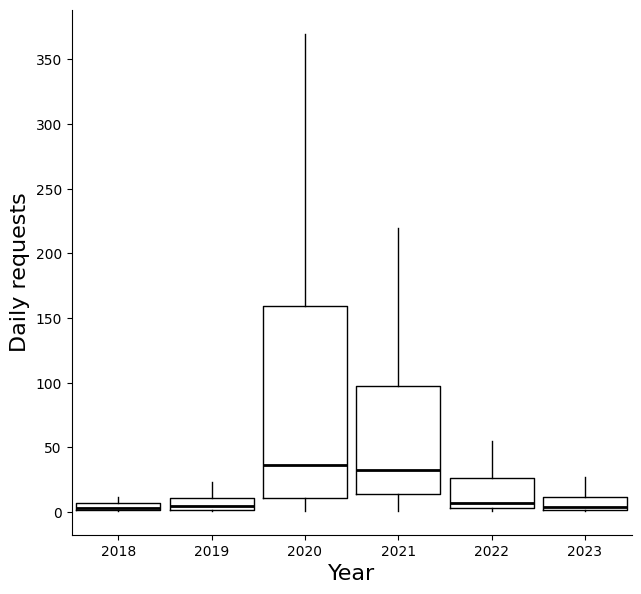

In [6]:
ax, fig=draw_box_plot(all_ftp_df_daily, 'nb_request', 'year', xlabel='Year', ylabel='Daily requests')

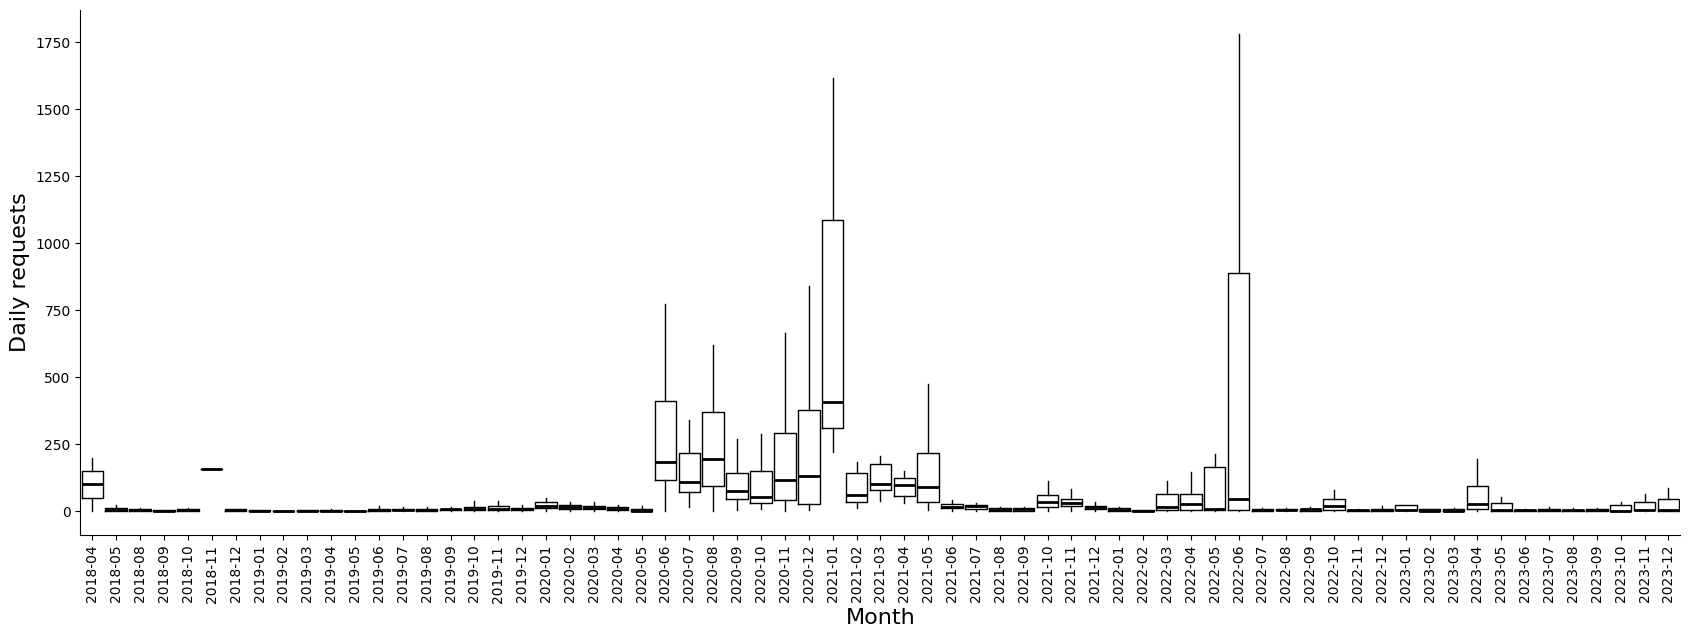

In [7]:
ax, fig=draw_box_plot(all_ftp_df_daily, 'nb_request', 'month', xlabel='Month', ylabel='Daily requests', x_rotation=90, fig_size=(20, 7))

## Number of daily FTP unique visitor per year and month

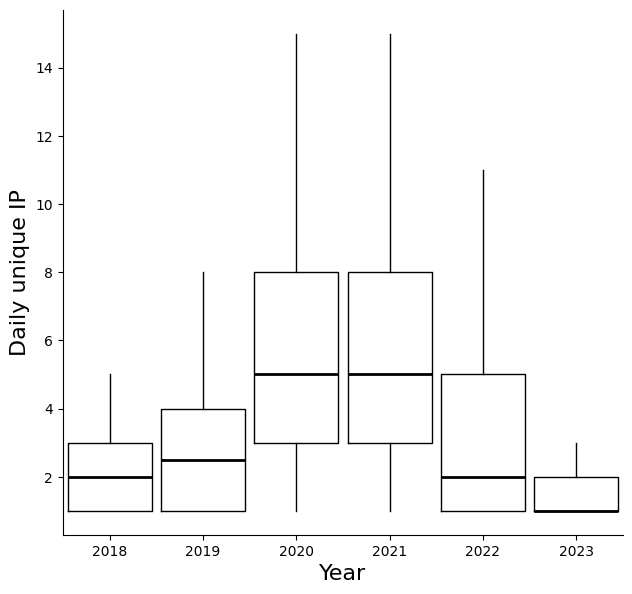

In [8]:
ax, fig=draw_box_plot(all_ftp_df_daily, 'uhost', 'year', xlabel='Year', ylabel='Daily unique IP')

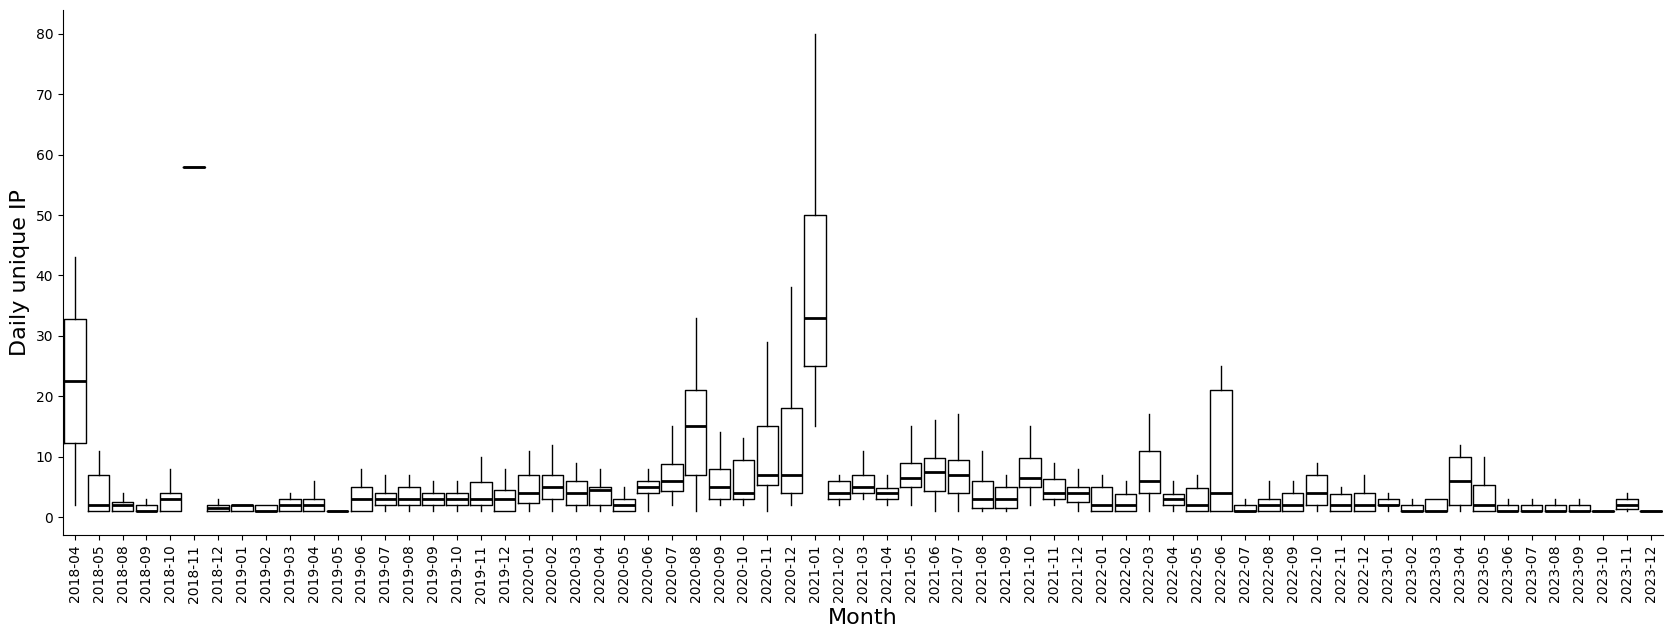

In [9]:
ax, fig=draw_box_plot(all_ftp_df_daily, 'uhost', 'month', xlabel='Month', ylabel='Daily unique IP', x_rotation=90, fig_size=(20, 7))

## Number of daily FTP download amount per year and month

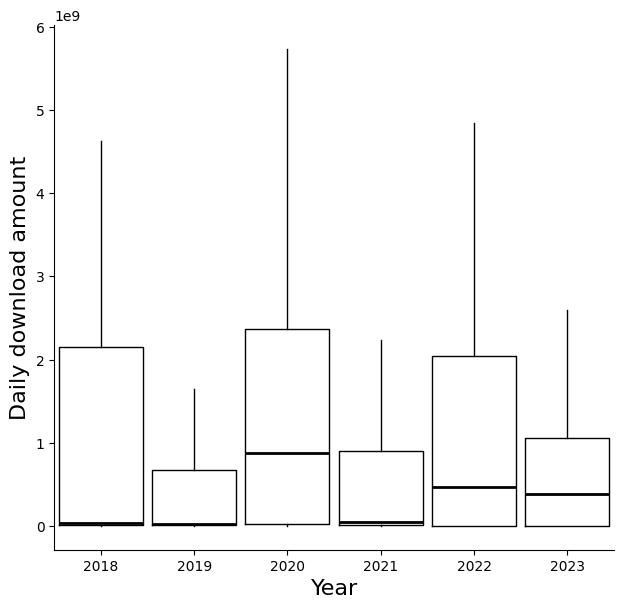

In [10]:
ax, fig=draw_box_plot(all_ftp_df_daily, 'file_size', 'year', xlabel='Year', ylabel='Daily download amount')

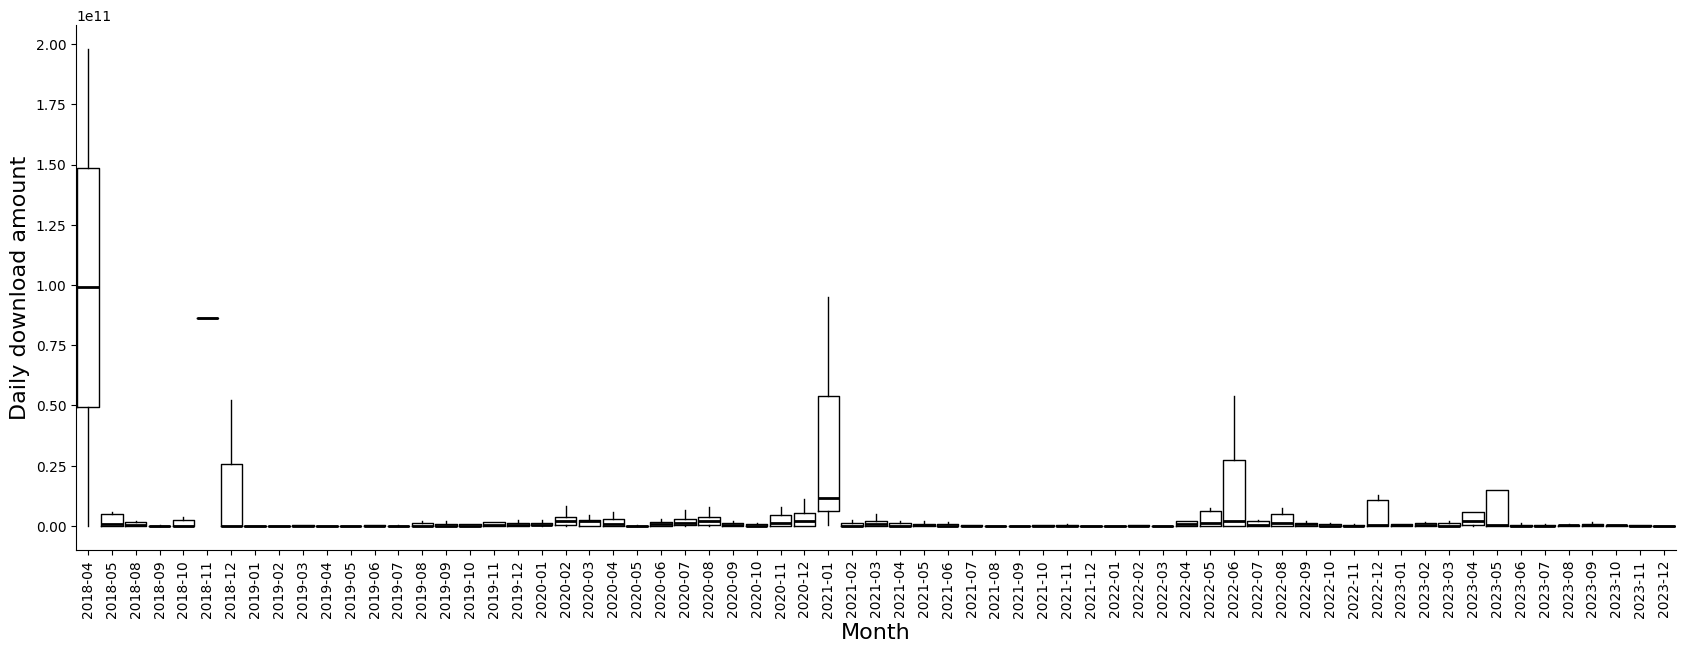

In [11]:
ax, fig=draw_box_plot(all_ftp_df_daily, 'file_size', 'month', xlabel='Month', ylabel='Daily download amount', x_rotation=90, fig_size=(20, 7))

## Number of daily web request per year and month

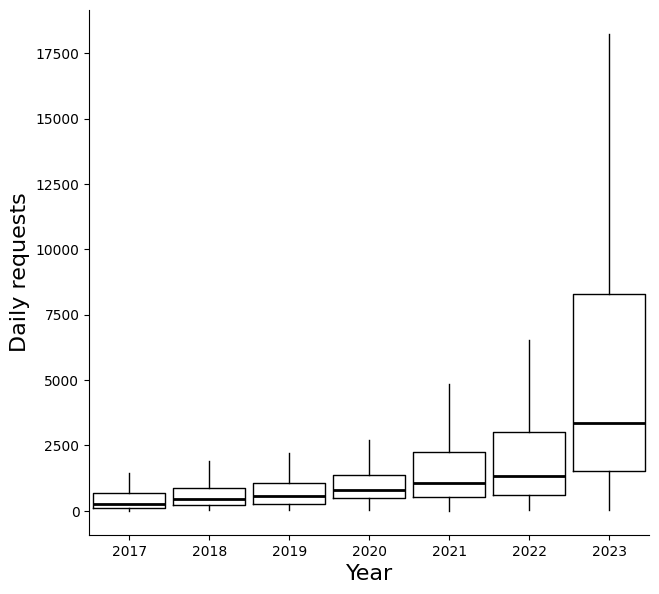

In [12]:
ax, fig=draw_box_plot(all_web_df_daily, 'nb_request', 'year', xlabel='Year', ylabel='Daily requests')

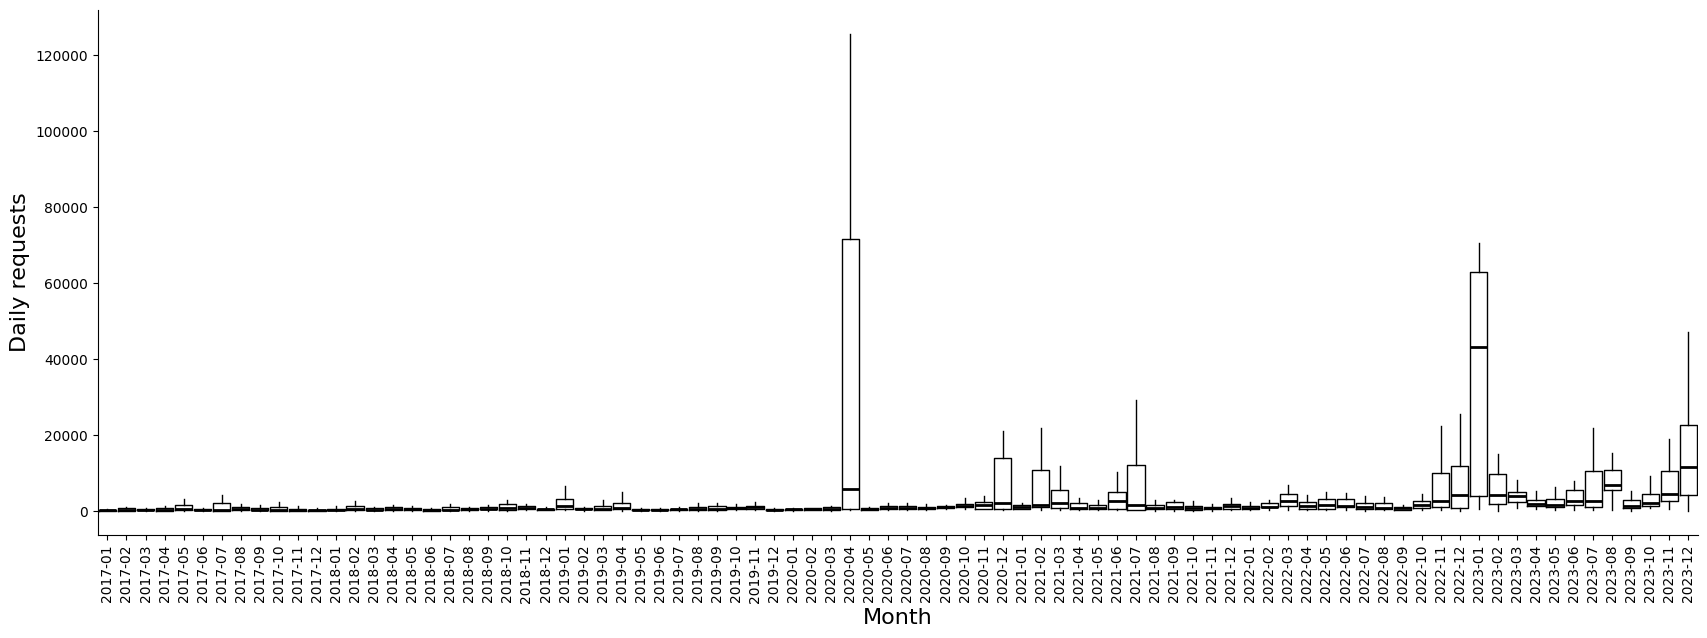

In [13]:
ax, fig=draw_box_plot(all_web_df_daily, 'nb_request', 'month', xlabel='Month', ylabel='Daily requests', x_rotation=90, fig_size=(20, 7))

## Number of daily web unique visitor per year and month

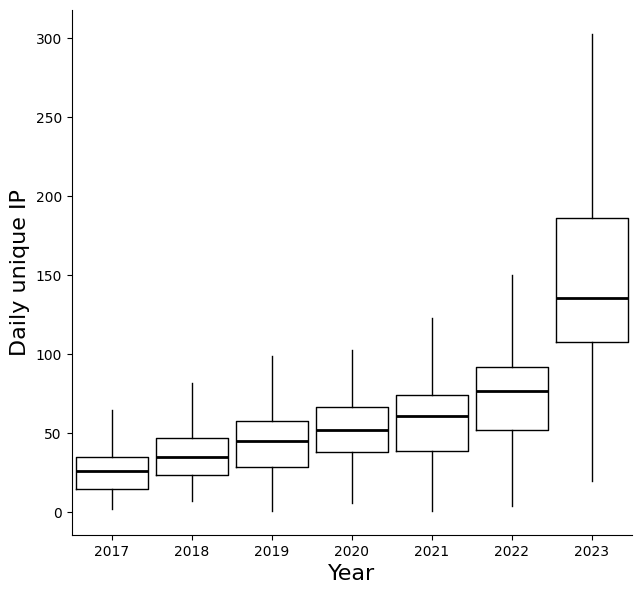

In [14]:
ax, fig=draw_box_plot(all_web_df_daily, 'unique_ip', 'year', xlabel='Year', ylabel='Daily unique IP')

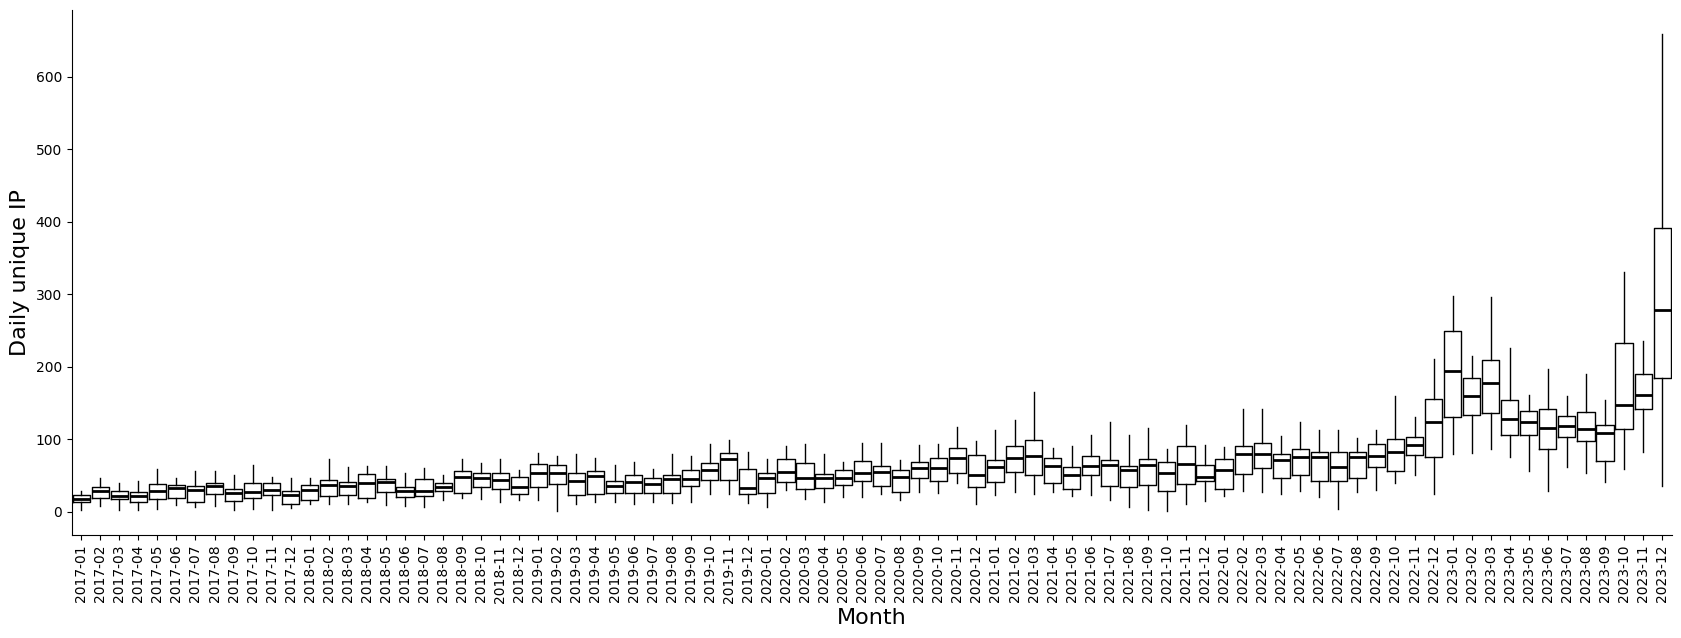

In [15]:
ax, fig=draw_box_plot(all_web_df_daily, 'unique_ip', 'month', xlabel='Month', ylabel='Daily unique IP', x_rotation=90, fig_size=(20, 7))

## Number of daily web download amount per year and month

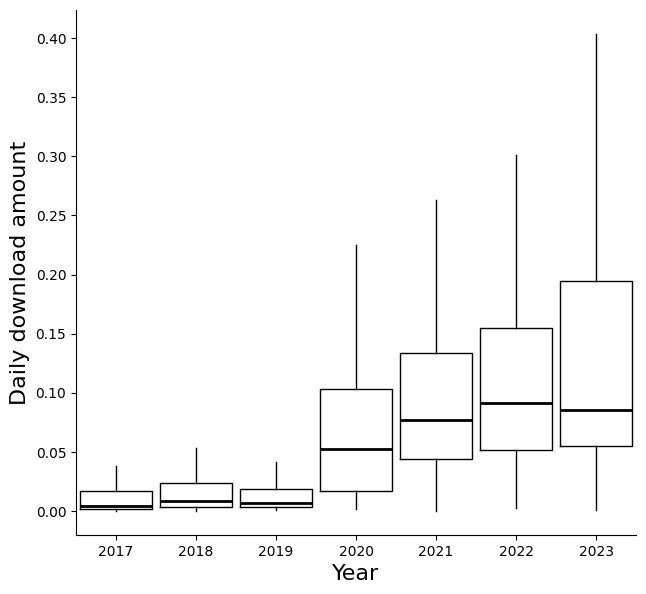

In [16]:
ax, fig=draw_box_plot(all_web_df_daily, 'bytes_out', 'year', xlabel='Year', ylabel='Daily download amount')

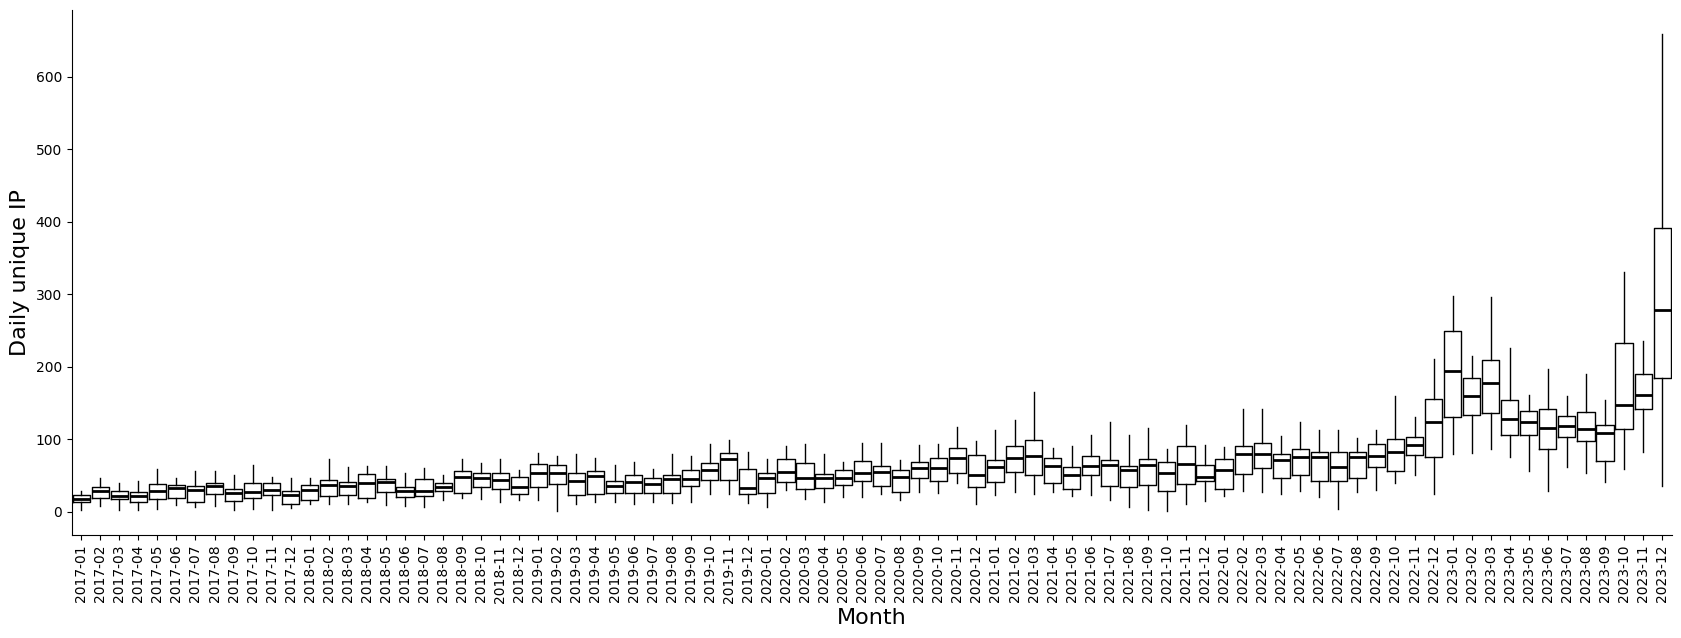

In [17]:
ax, fig=draw_box_plot(all_web_df_daily, 'unique_ip', 'month', xlabel='Month', ylabel='Daily unique IP', x_rotation=90, fig_size=(20, 7))

In [18]:
all_web_df['year']=pd.DatetimeIndex(all_web_df.request_ts).year
all_web_df['month']=pd.to_datetime(all_web_df.request_ts).dt.strftime('%Y-%m')
current_year_range = range(2017,2024)

In [19]:
all_web_df_yearly = all_web_df[all_web_df['year'].isin( current_year_range )].groupby(all_web_df.year).agg(
    bytes_out=pd.NamedAgg(column='bytes_out', aggfunc=lambda x: sum(x)/1000000000),
    unique_ip=pd.NamedAgg(column='client_ip', aggfunc='nunique'),
    nb_request=pd.NamedAgg(column='client_ip', aggfunc=lambda x: len(x)/1000000))
all_web_df_yearly.reset_index(inplace=True)
all_web_df_monthly = all_web_df[all_web_df['year'].isin( current_year_range )].groupby(all_web_df.month).agg(
    bytes_out=pd.NamedAgg(column='bytes_out', aggfunc=lambda x: sum(x)/1000000000),
    unique_ip=pd.NamedAgg(column='client_ip', aggfunc='nunique'),
    nb_request=pd.NamedAgg(column='client_ip', aggfunc=lambda x: len(x)/1000000))
all_web_df_monthly.reset_index(inplace=True)

In [20]:
all_ftp_df['year'] = pd.DatetimeIndex(all_ftp_df.event_ts).year
all_ftp_df['month']=pd.to_datetime(all_ftp_df.event_ts).dt.strftime('%Y-%m')
current_year_range = range(2017,2024)

In [21]:
all_ftp_df_yearly = all_ftp_df[all_ftp_df['year'].isin( current_year_range )].groupby(all_ftp_df.year).agg(
    file_size=pd.NamedAgg(column='file_size', aggfunc=lambda x: sum(x)/1000000000),
    uhost=pd.NamedAgg(column='uhost', aggfunc='nunique'),
    nb_request=pd.NamedAgg(column='uhost', aggfunc='count'))
all_ftp_df_yearly.reset_index(inplace=True)
all_ftp_df_monthly = all_ftp_df[all_ftp_df['year'].isin( current_year_range )].groupby(all_ftp_df.month).agg(
    file_size=pd.NamedAgg(column='file_size', aggfunc=lambda x: sum(x)/1000000000),
    uhost=pd.NamedAgg(column='uhost', aggfunc='nunique'),
    nb_request=pd.NamedAgg(column='uhost', aggfunc='count'))
all_ftp_df_monthly.reset_index(inplace=True)

In [22]:
def draw_bar_plot(dataframe, x, y, xlabel, ylabel, x_rotation=0, fig_size=(7, 7)):
    ax = dataframe.plot.bar(x=x, y=y, width = .9, color='k', legend=False, grid=False, fontsize=16, figsize=fig_size)
    ax.tick_params(axis='x', rotation=x_rotation)
    ax.set_facecolor('white')
    ax.set_ylabel(ylabel, fontdict={'fontsize':16})
    ax.set_xlabel(xlabel, fontdict={'fontsize':16})
    return ax

## Number of Gigabytes downloaded from FTP per year and month

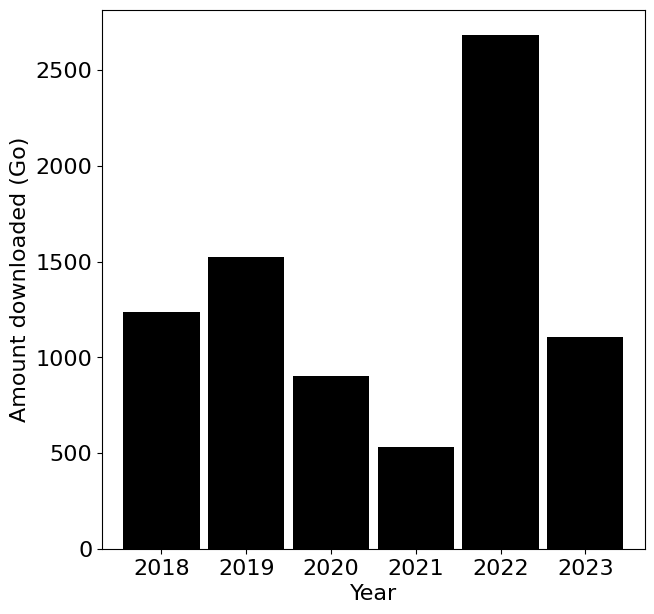

In [23]:
ax = draw_bar_plot(all_ftp_df_yearly, x='year', y='file_size', ylabel='Amount downloaded (Go)', xlabel='Year')

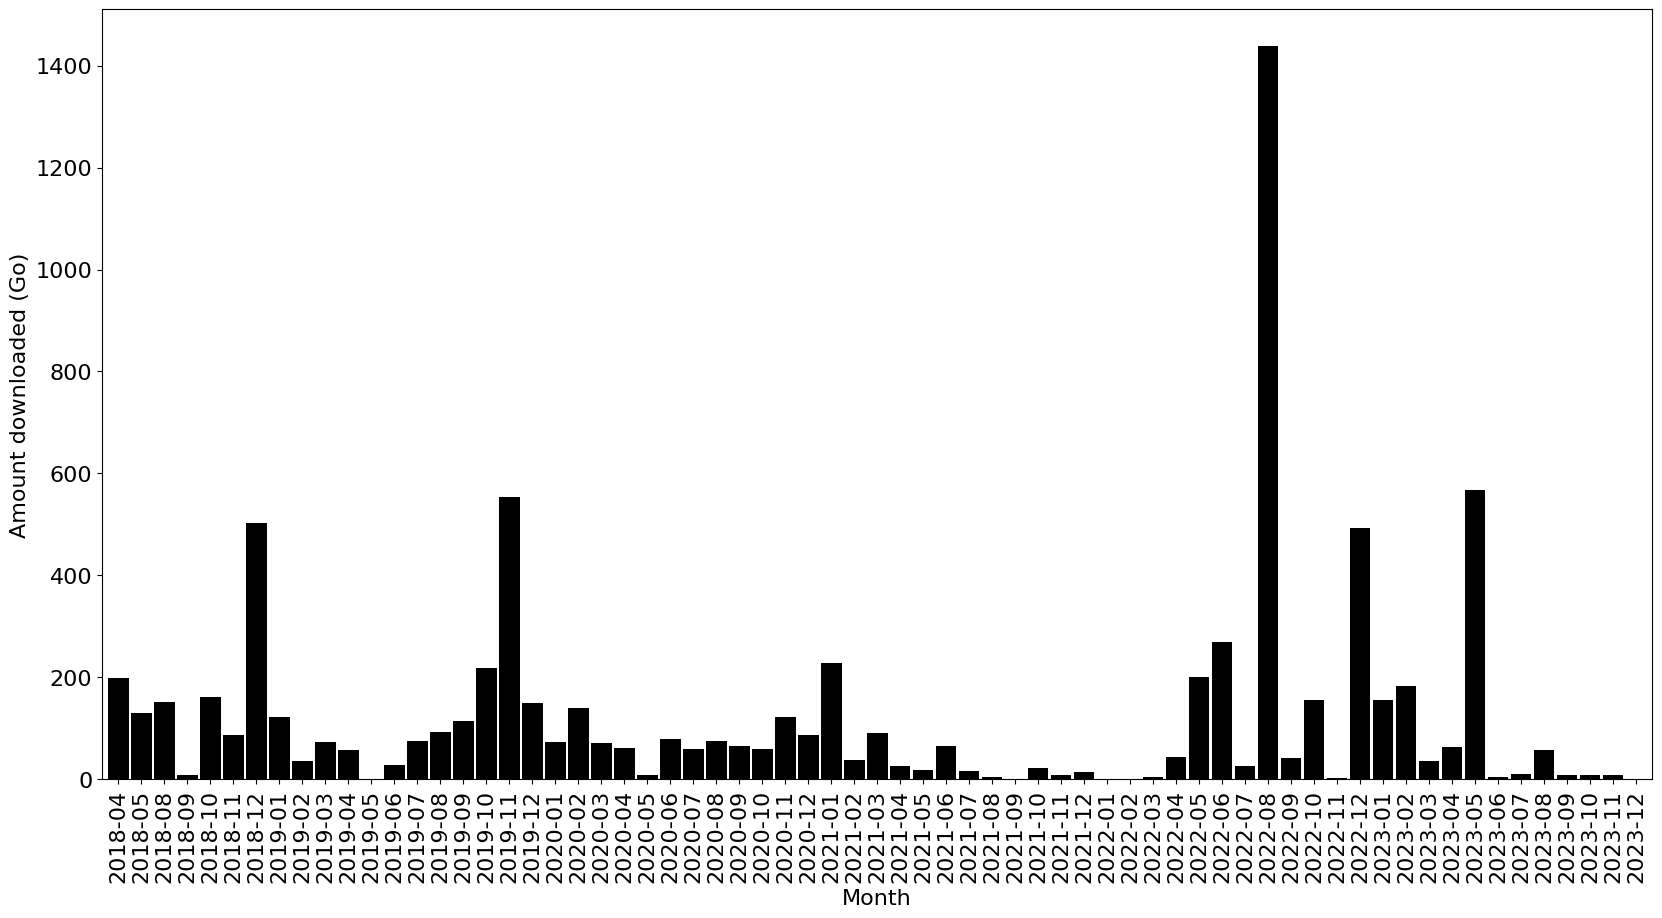

In [24]:
ax = draw_bar_plot(all_ftp_df_monthly, x='month', y='file_size', ylabel='Amount downloaded (Go)', xlabel='Month', x_rotation=90, fig_size=(20, 10))

## Number of unique visitor to the FTP per year and month

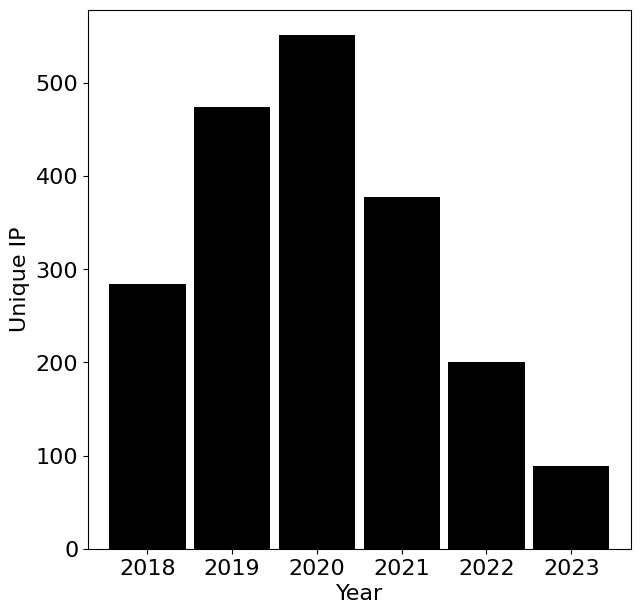

In [25]:
ax = draw_bar_plot(all_ftp_df_yearly, x='year', y='uhost', ylabel='Unique IP', xlabel='Year')

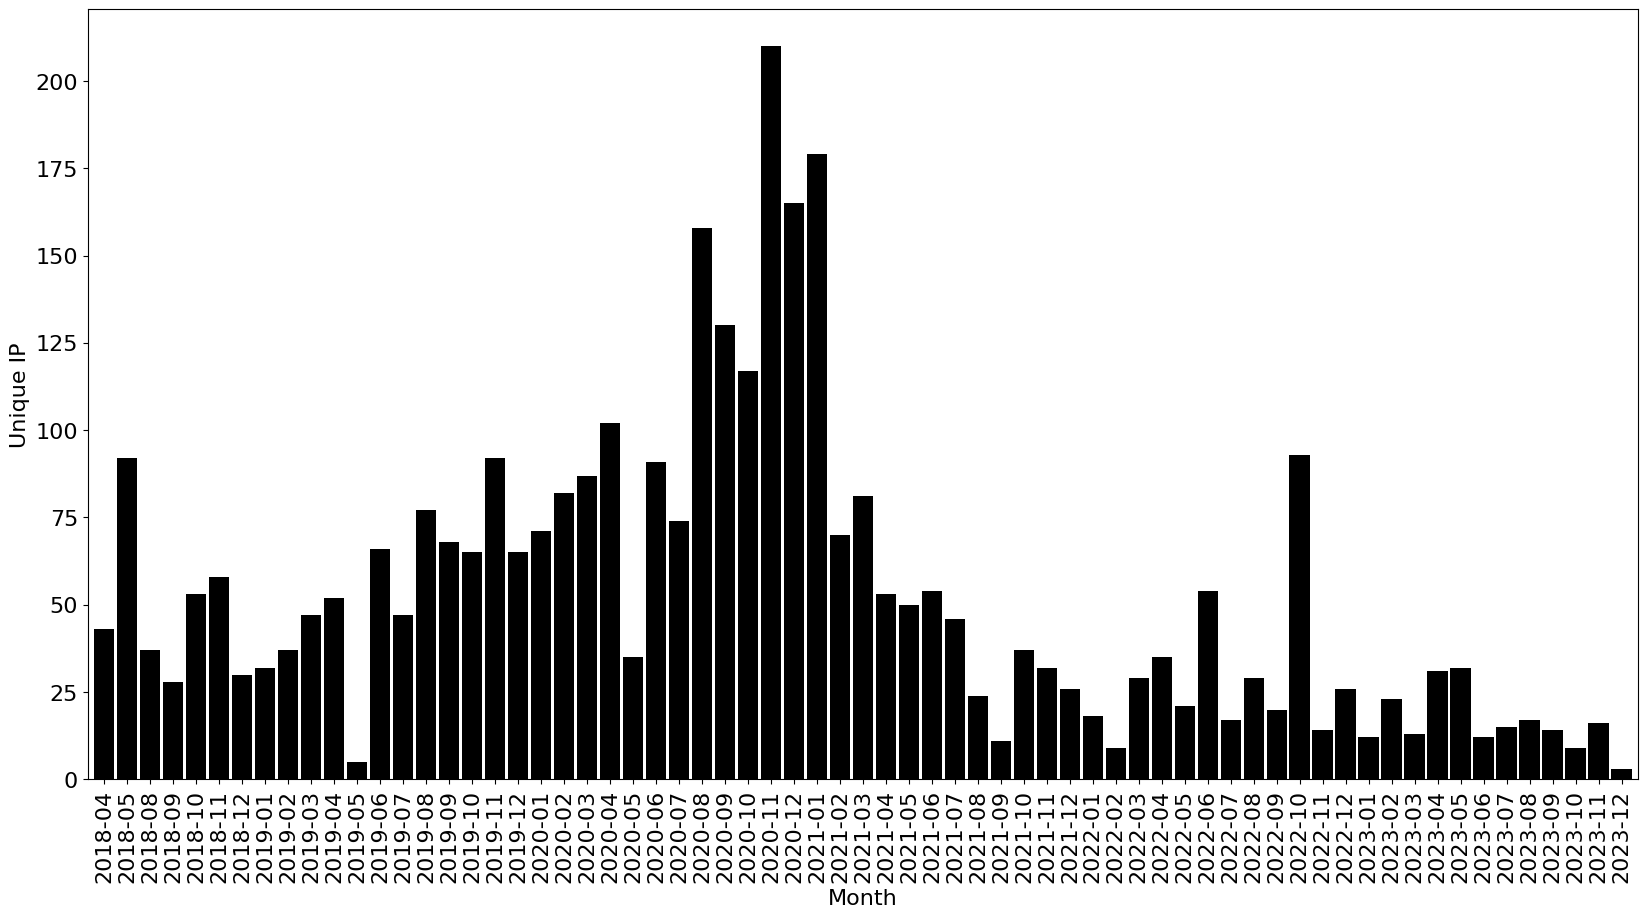

In [26]:
ax = draw_bar_plot(all_ftp_df_monthly, x='month', y='uhost', ylabel='Unique IP', xlabel='Month', x_rotation=90, fig_size=(20, 10))

## Number of request to the FTP per year and month

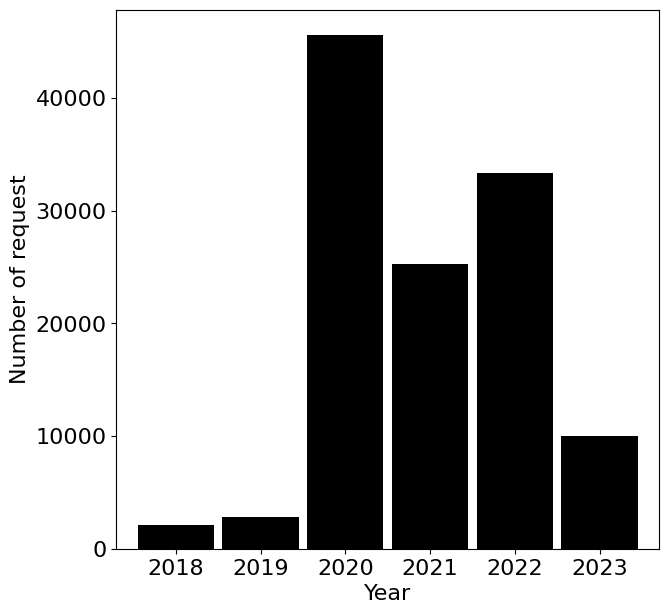

In [27]:
ax = draw_bar_plot(all_ftp_df_yearly, x='year', y='nb_request', ylabel='Number of request', xlabel='Year')

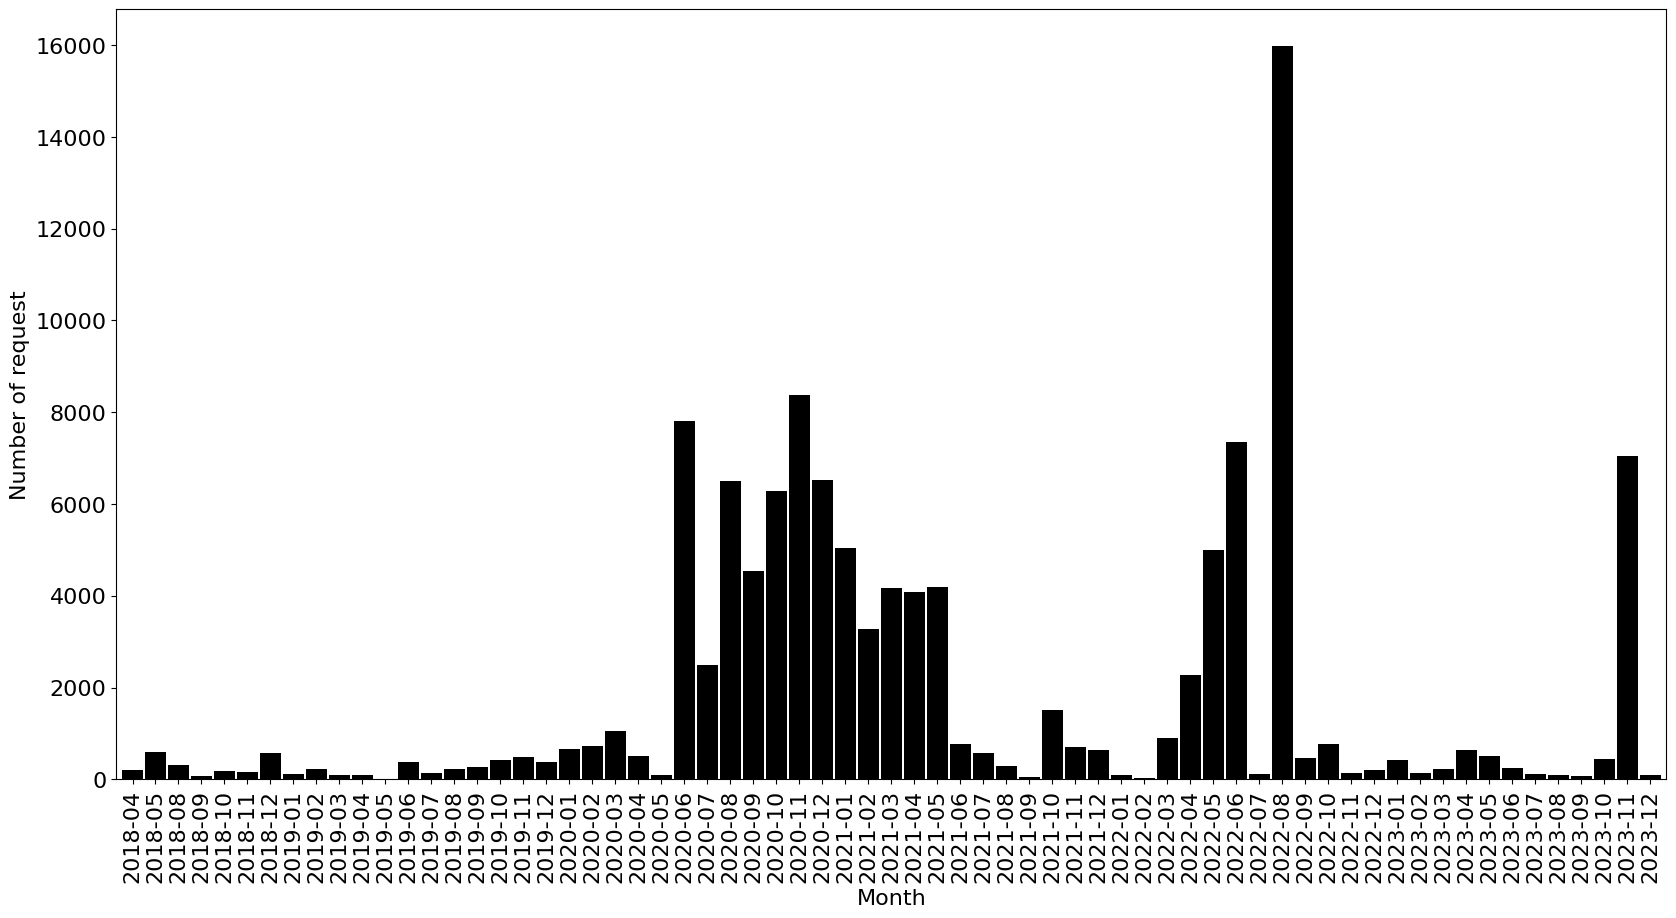

In [28]:
ax = draw_bar_plot(all_ftp_df_monthly, x='month', y='nb_request', ylabel='Number of request', xlabel='Month', x_rotation=90, fig_size=(20, 10))

## Number of Gigabytes downloaded from Website per year and month

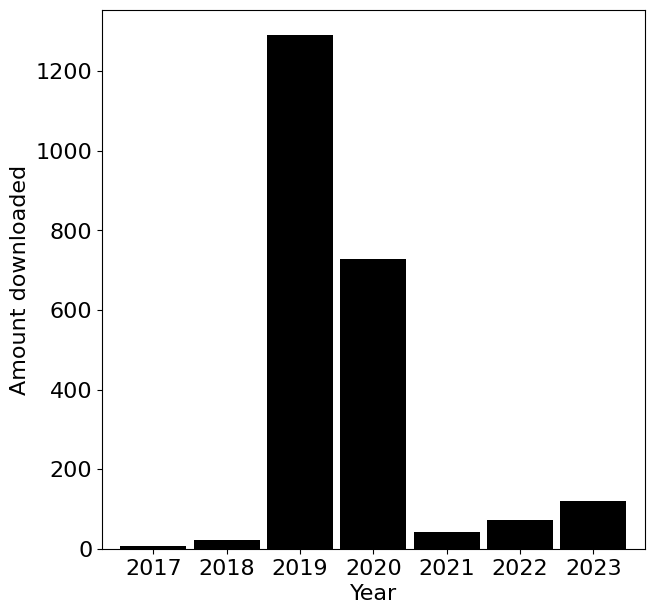

In [29]:
ax = draw_bar_plot(all_web_df_yearly, x='year', y='bytes_out', ylabel='Amount downloaded', xlabel='Year')

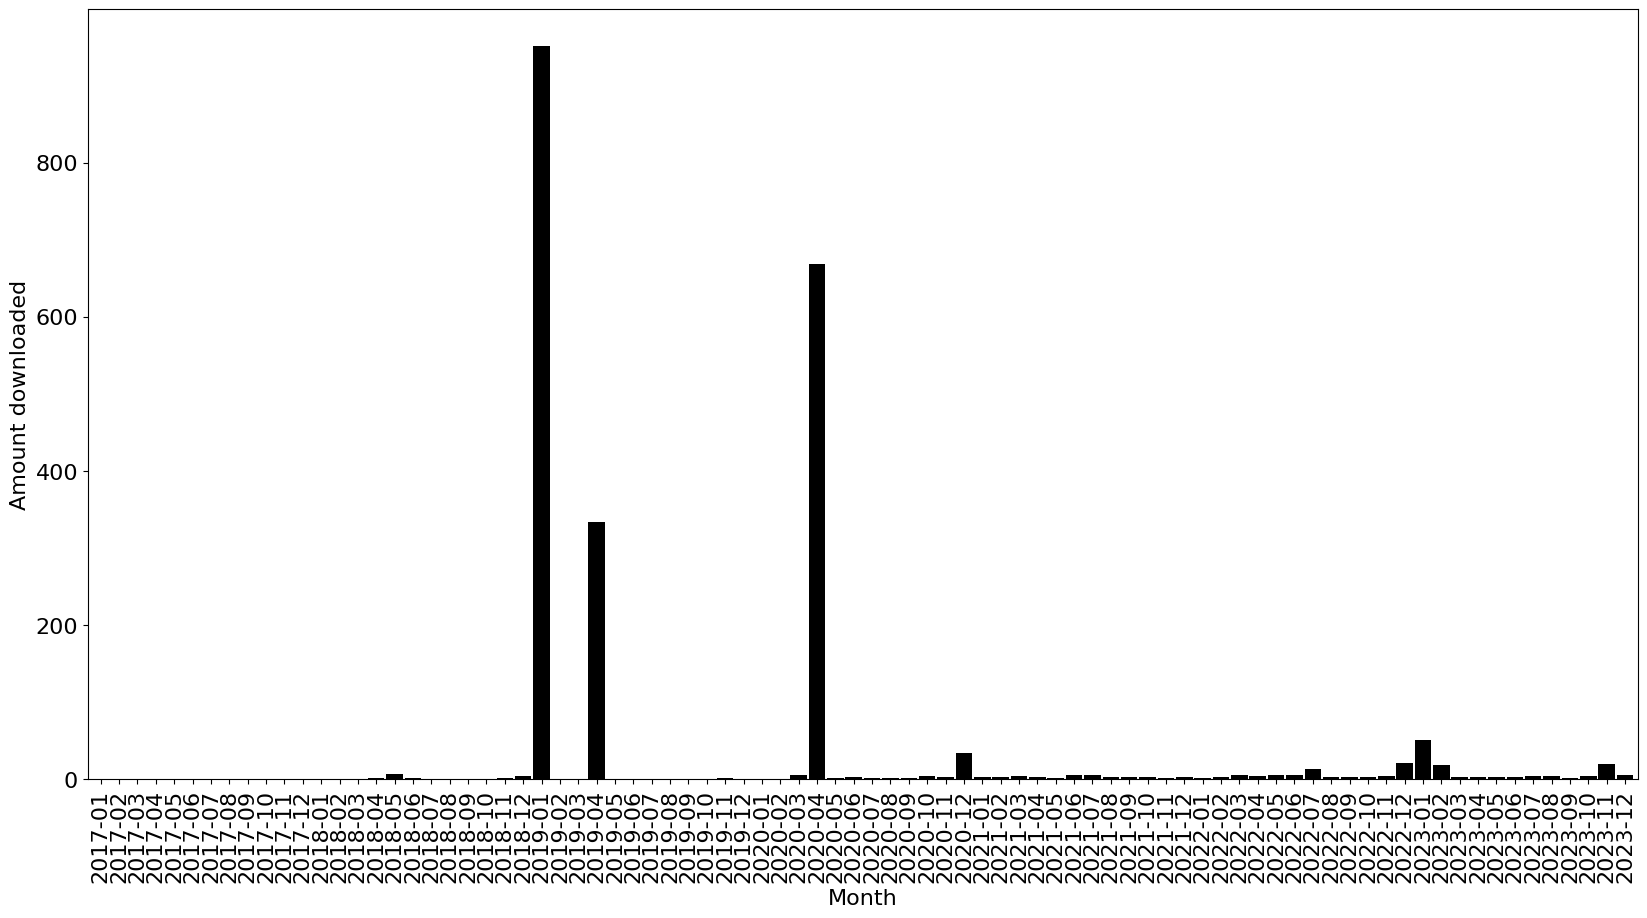

In [30]:
ax = draw_bar_plot(all_web_df_monthly, x='month', y='bytes_out', ylabel='Amount downloaded', xlabel='Month', x_rotation=90, fig_size=(20, 10))

## Number of unique visitor to the website per year and month

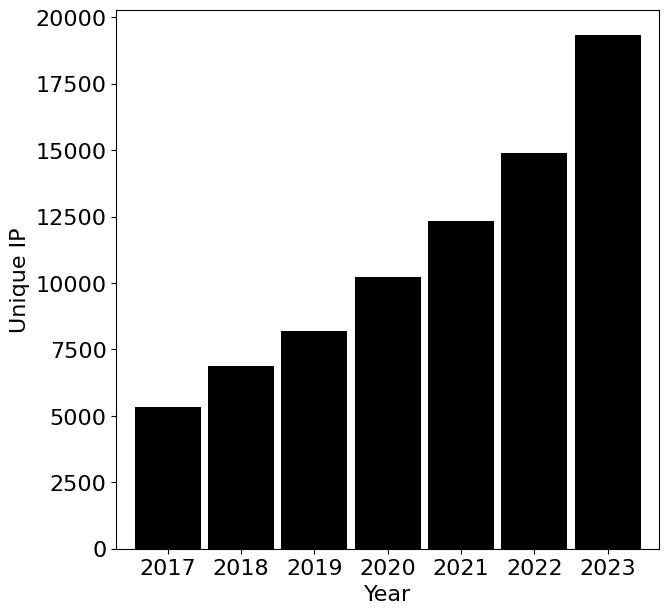

In [31]:
ax = draw_bar_plot(all_web_df_yearly, x='year', y='unique_ip', ylabel='Unique IP', xlabel='Year')

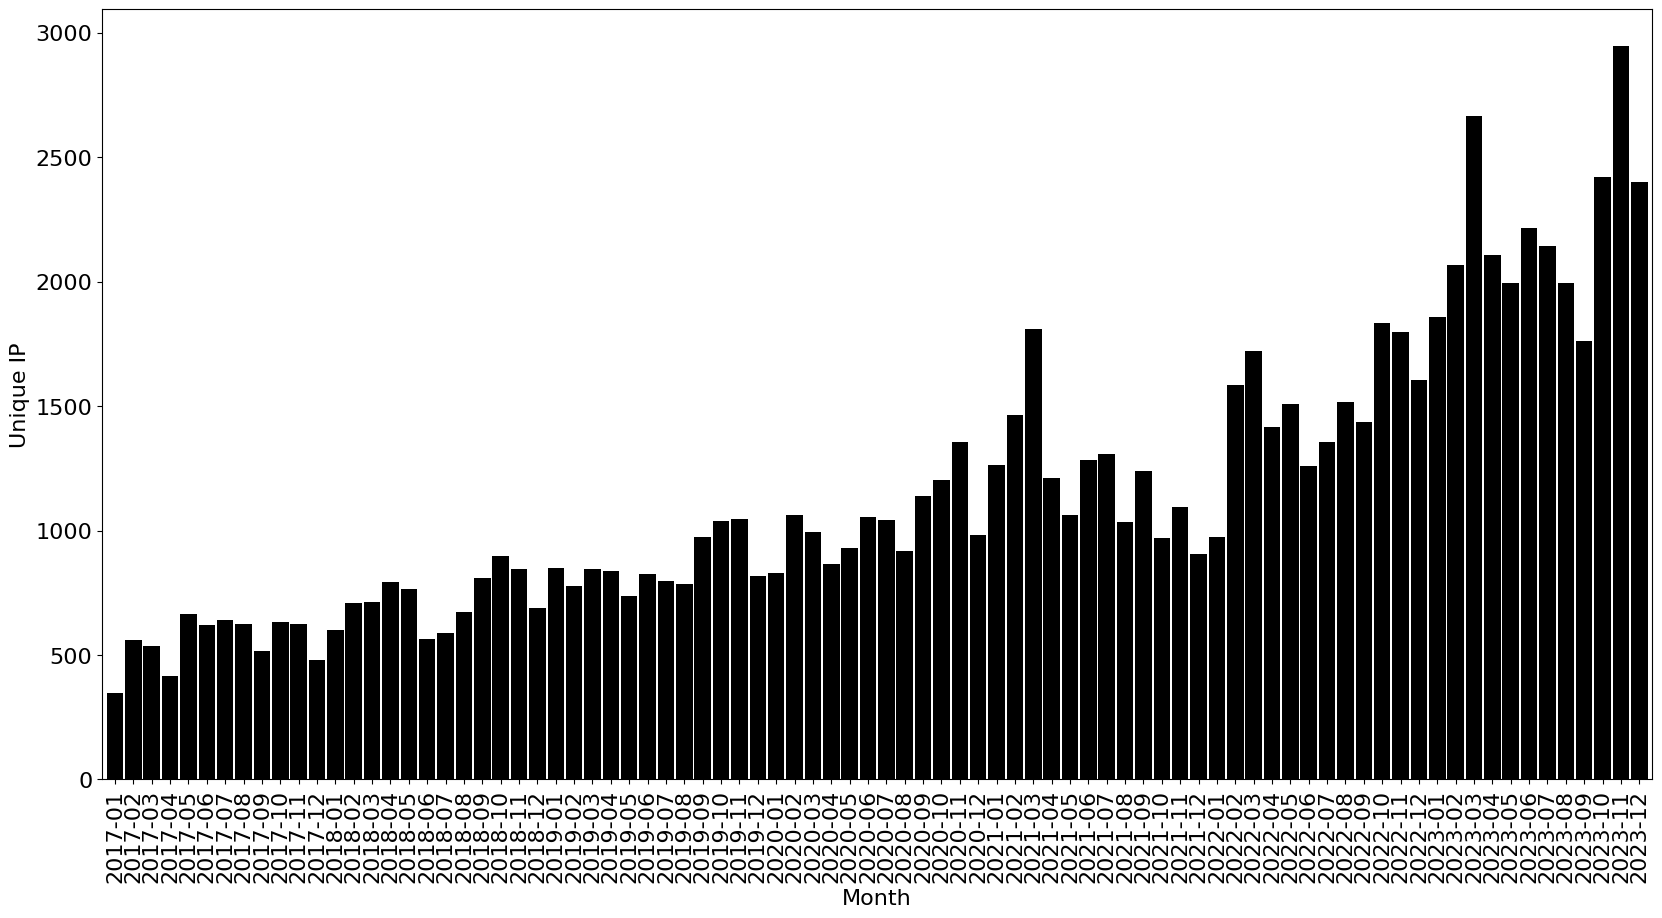

In [32]:
ax = draw_bar_plot(all_web_df_monthly, x='month', y='unique_ip', ylabel='Unique IP', xlabel='Month', x_rotation=90, fig_size=(20, 10))

## Number of request to the FTP per year and month

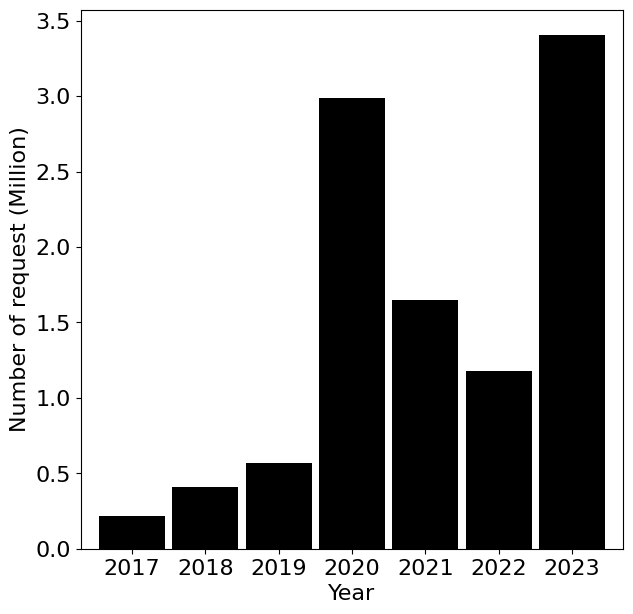

In [33]:
ax = draw_bar_plot(all_web_df_yearly, x='year', y='nb_request', ylabel='Number of request (Million)', xlabel='Year')

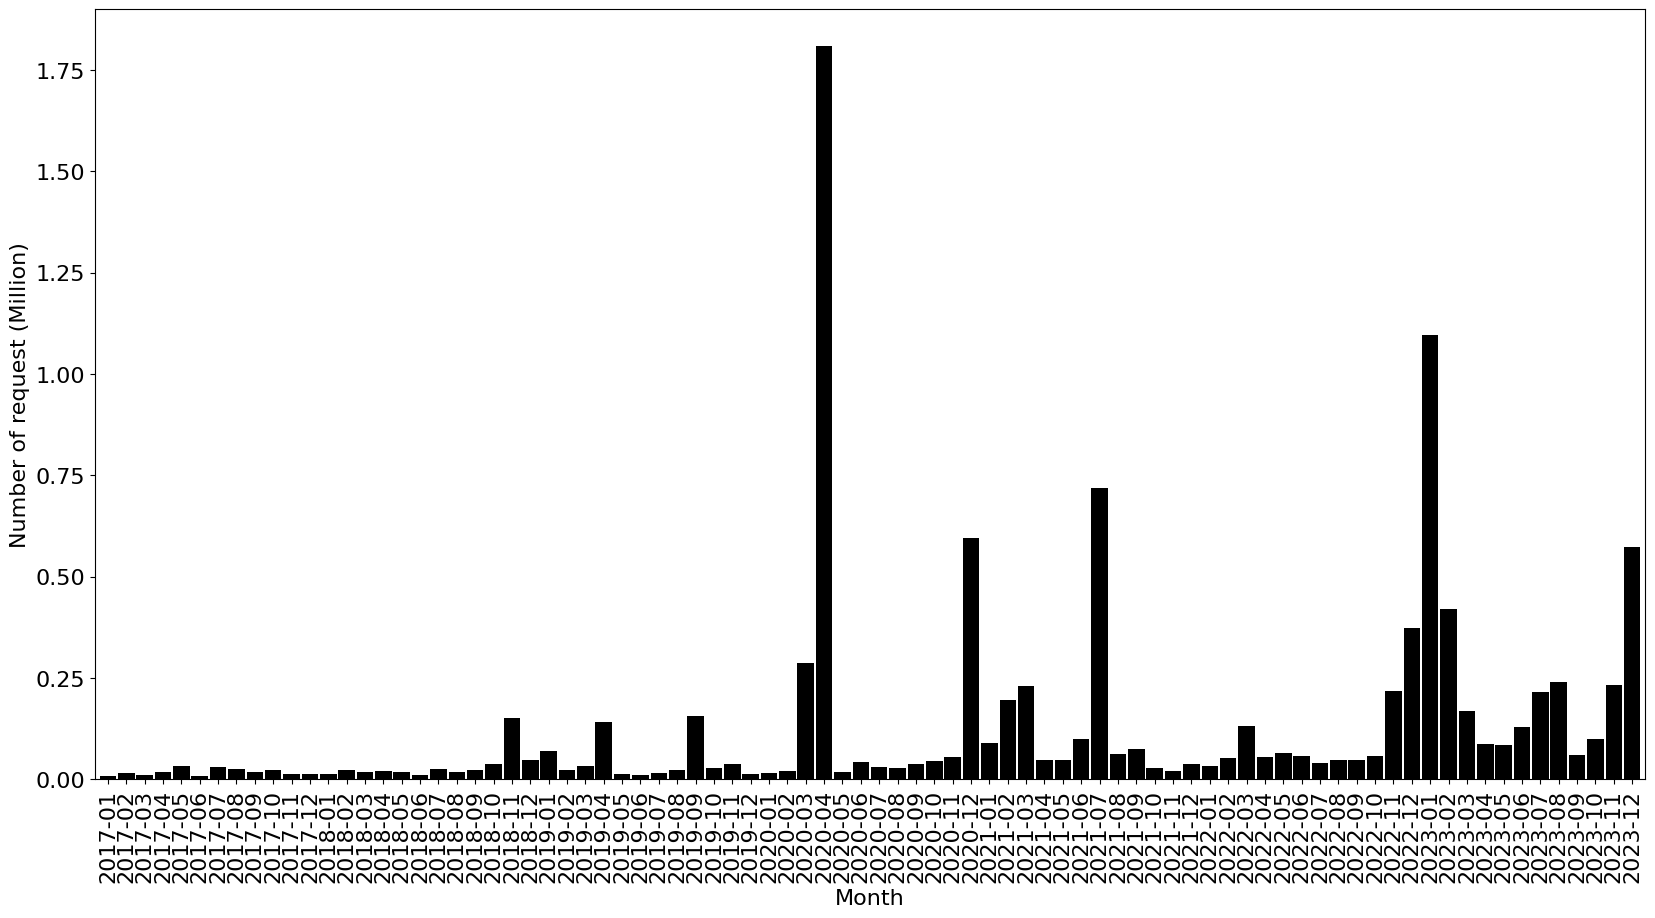

In [34]:
ax = draw_bar_plot(all_web_df_monthly, x='month', y='nb_request', ylabel='Number of request (Million)', xlabel='Month', x_rotation=90, fig_size=(20, 10))